# **TP 2 : Linear regression**

DE MENEZES LIMA, Marina

16/02/2022

In [1]:
fn1 = "marina"
ln1 = "de_menezes_lima"
filename = "_".join(map(lambda s: s.strip().lower(),
["SD-TSIA204_lab2", ln1, fn1])) + ".ipynb"

print(filename)

sd-tsia204_lab2_de_menezes_lima_marina.ipynb


In [2]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
import random as rd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.decomposition import PCA
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV
from sklearn.preprocessing import scale

## Exercise 1

We start this project by loading the data and preprocessing it by the established steps:

In [3]:
# Setting the random seed to 0
random_seed = np.random.seed(0)

In [4]:
# Loading the data
df = pd.read_csv('data_dm3.csv', header=None)

#Naming the columns
df.columns = [str(i) for i in range(1, 212)]
df = df.rename(columns = {'211':'Y'})

df.head()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,...,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,Y
0,-1.298173,-0.162249,1.223379,1.355554,1.080171,0.634979,0.298741,0.548270,0.731773,1.018645,-0.143979,-0.040059,0.842802,-0.379206,0.916746,-2.355941,-0.999524,-0.110796,1.712279,2.884387,-0.645134,3.745493,0.656654,-0.370989,0.993688,-1.383539,-1.018153,0.387654,-0.014052,-0.360692,-0.531013,0.341585,0.783628,-1.248698,-0.054499,-0.337745,-1.869383,0.656658,0.014553,-0.858207,...,1.110790,-0.254486,0.662526,-0.912451,-0.477240,-1.532187,-0.461441,-2.525748,0.568322,0.520620,-0.516160,-0.467396,1.365251,0.280318,1.438662,-1.471489,-1.292056,1.184959,0.089917,0.521071,-1.173316,0.512151,-0.374910,0.451388,-0.295596,-0.696280,1.517710,-1.244537,-0.229723,0.937546,0.588278,0.210106,1.861458,-0.436399,0.279299,-1.416020,-2.332363,0.215096,-0.693319,151.0
1,0.166951,-0.338060,-0.618867,0.759366,1.134281,-0.536844,-0.075120,0.970251,-0.327487,0.717310,1.248562,-0.527688,1.260376,0.673029,-0.507056,1.441486,0.684543,-1.427168,-0.827024,1.387451,-0.624598,-0.216404,-0.022431,-1.938479,-1.143878,-0.941538,0.587944,0.409334,-0.226553,-0.274476,-0.301681,-0.548755,0.660260,-0.292527,-0.830301,-0.024815,0.093171,0.184854,0.659346,0.023453,...,-0.413022,-0.905504,-0.775072,1.564414,-0.838463,0.342608,-0.874917,0.728367,-1.104763,-0.004731,0.665348,-2.213558,1.735811,0.063891,-0.349194,-1.191502,-0.103416,1.155222,-0.933356,0.237656,0.547982,-0.884854,-1.281770,0.677351,0.734293,-0.688901,-0.045326,1.858089,0.468615,0.940726,-0.251054,-0.825716,0.339139,1.119430,0.225958,-0.822288,0.382838,-0.718829,-0.188993,75.0
2,-0.416177,-0.205659,-1.282226,1.675500,1.523746,0.192029,-0.235840,-1.954626,-0.853309,0.892791,2.269739,0.521300,0.221907,0.041486,-0.360214,-0.675852,-2.107100,-0.344865,1.284206,1.483036,0.454233,1.467267,-0.216011,-0.545154,0.451173,1.071382,0.654145,-1.256757,0.659401,-2.981795,-0.399291,-0.200168,-1.284389,-0.694969,-0.054499,-0.744916,-0.153516,-0.009057,-1.076121,-0.576408,...,1.158315,-0.195460,-0.222329,-0.680245,0.449108,1.137670,1.092085,-1.793062,-1.493069,0.914259,-2.230965,1.612821,0.536945,2.220749,-0.257719,-0.213694,-0.203711,2.126828,-0.118523,-1.822842,2.315821,-0.926919,-0.946186,-0.212913,2.137168,2.038290,-0.700610,1.930568,0.674011,0.338998,1.283837,0.372516,-0.652557,-2.579347,0.139267,-1.901196,0.048210,0.220205,0.471588,141.0
3,0.867184,-0.398667,0.093501,0.025971,1.852099,0.789774,0.801775,0.376711,0.853689,0.247953,2.316057,1.729722,-0.410363,1.030486,0.749292,-0.641629,-0.374515,0.879445,0.651940,0.740688,1.562574,0.320537,1.944994,-0.196823,0.459805,2.439480,-0.425467,-0.180575,0.757501,-0.393359,0.742157,1.148394,-0.295954,0.589195,0.721302,-0.384002,-0.098398,0.280842,1.040315,1.107964,...,-1.682714,0.413769,1.939559,-0.757647,0.540113,-0.970314,-0.088178,0.666974,0.396550,-1.206687,-0.180724,1.550825,0.416229,-1.037434,0.187025,-0.756704,0.506757,-1.756789,-0.914933,0.939691,0.289688,-1.040168,-0.085549,0.501772,1.531429,-0.393853,0.019174,-0.441214,-0.907674,0.733290,0.446582,0.334733,0.399074,-0.884172,0.723819,1.316367,0.088218,0.619496,1.061662,206.0
4,1.193282,-0.936980,-0.725039,0.766078,0.223489,-1.584622,1.146866,0.086136,-0.088780,-0.945066,-0.581929,0.140765,2.355125,0.858106,-0.042145,-2.664192,0.497189,-0.893489,-0.017889,1.873641,-2.213195,0.919168,-0.528519,-0.980568,-0.493626,-0.321895,2.267136,0.389260,0.591138,-0.814959,0.762401,0.550898,-0.902846,-0.364612,-0.054499,-0.207449,0.079756,1.541593,0.304692,-0.724918,...,0.440052,-0.224748,1.442341,0.171178,-2.440689,-0.367109,1.696386,-1.084878,-0.916147,-0.808334,-1.280435,0.106587,0.207964,0.146344,-0.877800,0.254671,-0.448050,0.555055,-0.363932,-0.206795,-0.925217,-0.681352,2.303520,2.242593,-1.258877,1.435178,0.807625,-0.391935,-0.333781,-0.714867,0.786157,

As the last column represents the output Y, we then have 210 covariates. From the number of rows, we can also see that there are 442 observations.

In [5]:
# Separating the data frame in two matrices: X (input) and Y (output)
X = df.iloc[:,:-1] 
y = df.iloc[:,210]

print("Matrix X: ")
print(X)

print("Matrix Y: ")
print(y)

Matrix X: 
            1         2         3  ...       208       209       210
0   -1.298173 -0.162249  1.223379  ... -2.332363  0.215096 -0.693319
1    0.166951 -0.338060 -0.618867  ...  0.382838 -0.718829 -0.188993
2   -0.416177 -0.205659 -1.282226  ...  0.048210  0.220205  0.471588
3    0.867184 -0.398667  0.093501  ...  0.088218  0.619496  1.061662
4    1.193282 -0.936980 -0.725039  ... -1.901502  1.778811 -0.489853
..        ...       ...       ...  ...       ...       ...       ...
437 -0.270323 -0.437638  0.347423  ...  0.158006 -0.139519  1.010518
438  0.872196  0.975497  0.819331  ...  0.663206  1.278693  0.419890
439 -0.032586 -0.571893  0.806842  ... -0.084541  0.301755  0.517624
440 -1.529754  0.756967  2.251588  ...  0.491072 -1.389069  0.473725
441  0.942724  1.389141 -0.028890  ...  0.616853 -0.047552  0.897446

[442 rows x 210 columns]
Matrix Y: 
0      151.0
1       75.0
2      141.0
3      206.0
4      135.0
       ...  
437    178.0
438    104.0
439    132.0
440    

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,...,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,...,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02
mean,2.411344e-17,-2.310871e-17,1.210382e-17,-1.054963e-17,1.632681e-17,-2.310871e-17,2.474140e-17,2.662526e-17,2.511817e-18,-1.004727e-17,-1.488251e-17,2.838353e-17,-3.843080e-17,-3.136631e-17,-3.598178e-17,-6.524444e-17,3.265362e-17,6.530724e-18,2.838353e-17,-4.169616e-17,-3.522823e-17,-6.530724e-18,-2.310871e-17,-3.591898e-17,1.054963e-17,-2.813235e-17,-2.033002e-17,-6.555842e-17,-5.224579e-17,5.124106e-17,-2.033002e-17,1.984335e-17,1.507090e-18,2.565193e-17,-1.863768e-16,-2.762998e-17,1.331263e-17,-3.667253e-17,-4.646861e-18,6.480487e-17,...,-1.607563e-17,6.631196e-17,-7.786632e-18,3.566780e-17,-3.918434e-17,1.808508e-17,-9.796086e-18,-6.430251e-17,-1.908981e-17,3.629575e-17,-3.767725e-18,2.009453e-17,-4.018907e-18,3.817962e-17,1.883863e-18,-1.708035e-17,1.550053e-17,2.310871e-17,1.431736e-17,9.796086e-18,-2.499258e-17,1.959217e-17,-3.843080e-17,3.093459e-17,-3.516544e-18,-3.767725e-17,4.069143e-17,-2.888589e-17,7.931062e-17,2.712762e-17,2.034572e-17,-7.786632e-18,-3.591898e-17,7.535450e-18,-2.122485e-17,1.004727e-18,1.858744e-17,-2.511817e-19,-1.306145e-17,8.037814e-18
std,1.001133e+00,1.001133e+00,1.001133e+00,1.001133e+00,1.001133e+00,1.001133e+00,1.001133e+00,1.001133e+00,1.001133e+00,1.001133e+00,1.001133e+00,1.001133e+00,1.001133e+00,1.001133e+00,1.001133e+00,1.001133e+00,1.001133e+00,1.001133e+00,1.001133e+00,1.001133e+00,1.001133e+00,1.001133e+00,1.001133e+00,1.001133e+00,1.001133e+00,1.001133e+00,1.001133e+00,1.001133e+00,1.001133e+00,1.001133e+00,1.001133e+00,1.001133e+00,1.001133e+00,1.001133e+00,1.001133e+00,1.001133e+00,1.001133e+00,1.001133e+00,1.001133e+00,1.001133e+00,...,1.001133e+00,1.001133e+00,1.001133e+00,1.001133e+00,1.001133e+00,1.001133e+00,1.001133e+00,1.001133e+00,1.001133e+00,1.001133e+00,1.001133e+00,1.001133e+00,1.001133e+00,1.001133e+00,1.001133e+00,1.001133e+00,1.001133e+00,1.001133e+00,1.001133e+00,1.001133e+00,1.001133e+00,1.001133e+00,1.001133e+00,1.001133e+00,1.001133e+00,1.001133e+00,1.001133e+00,1.001133e+00,1.001133e+00,1.001133e+00,1.001133e+00,1.001133e+00,1.001133e+00,1.001133e+00,1.001133e+00,1.001133e+00,1.001133e+00,1.001133e+00,1.001133e+00,1.001133e+00
min,-3.149247e+00,-2.862871e+00,-3.057543e+00,-2.856903e+00,-3.102347e+00,-2.782344e+00,-2.825318e+00,-3.626525e+00,-2.834007e+00,-2.695861e+00,-3.512744e+00,-2.862884e+00,-2.514816e+00,-2.699264e+00,-3.017826e+00,-2.878607e+00,-3.205599e+00,-2.691592e+00,-3.150922e+00,-3.152562e+00,-2.364779e+00,-3.301959e+00,-2.467766e+00,-2.896390e+00,-3.590572e+00,-2.722266e+00,-2.576072e+00,-3.356504e+00,-2.913073e+00,-3.163441e+00,-3.403185e+00,-2.973001e+00,-2.609584e+00,-3.388514e+00,-1.606102e+00,-3.076520e+00,-2.793208e+00,-2.719300e+00

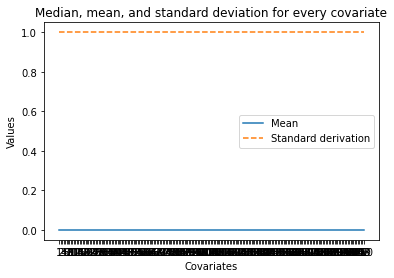

In [6]:
# Checking the median, mean, and standard deviation of every covariate
mean = X.mean(axis=0)
std = X.std(axis=0)

plt.figure()
plt.plot(mean, label='Mean')
plt.plot(std, label= 'Standard derivation', ls='--')
plt.title('Median, mean, and standard deviation for every covariate')
plt.xlabel('Covariates')
plt.ylabel('Values')
plt.legend()

X.describe()

As we can see from both the plot and the table, the mean value of each covariate is really close to 0 and their standard derivation is really close to 1, meaning that the data is a normalized and centralized gaussian.

However, we can not make the same affirmation for the observation matrix Y, since its values are neither close to 0 nor to 1:

In [7]:
y.describe()

count    442.000000
mean     152.133484
std       77.093005
min       25.000000
25%       87.000000
50%      140.500000
75%      211.500000
max      346.000000
Name: Y, dtype: float64

We then separate the covariate data in train and test sets, saving one fourth of the data as testing:

In [8]:
# One fourth of the data as testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=random_seed)

Even though our data is already centered and normalized, we are going to reinforce it by using the functions *fit_transform* and *transform* on the train and test data. We can see that the values continue to be close to 0 and 1 as before. This time we will also scale our observation data Y.

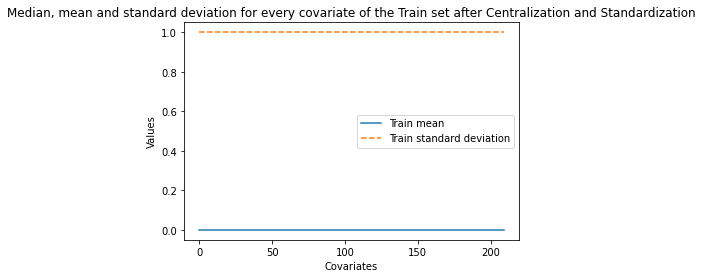

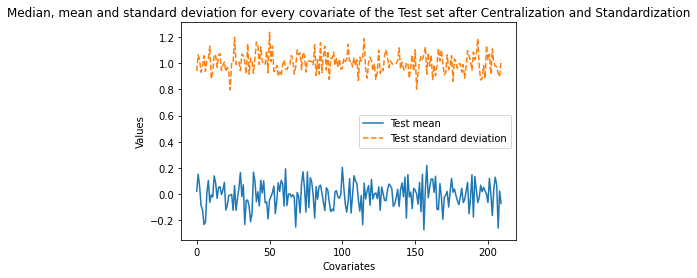

In [9]:
# Plotting the mean and standard deviation of every covariate after Centralization and standardization
scaler = StandardScaler()

# Train data
X_train = scaler.fit_transform(X_train)
Xtrain_mean = X_train.mean(axis=0)
Xtrain_std = X_train.std(axis=0)

plt.figure()
plt.plot(Xtrain_mean, label="Train mean")
plt.plot(Xtrain_std, label="Train standard deviation", ls='--')
plt.title('Median, mean and standard deviation for every covariate of the Train set after Centralization and Standardization')
plt.xlabel('Covariates')
plt.ylabel('Values')
plt.legend()

# Test data
X_test = scaler.transform(X_test)
Xtest_mean = X_test.mean(axis=0)
Xtest_std = X_test.std(axis=0)

plt.figure()
plt.plot(Xtest_mean, label="Test mean")
plt.plot(Xtest_std, label="Test standard deviation", ls='--')
plt.title('Median, mean and standard deviation for every covariate of the Test set after Centralization and Standardization')
plt.xlabel('Covariates')
plt.ylabel('Values')
plt.legend()

# Scaling of y
y_train = scale(y_train)
y_test = scale(y_test)


To end the preprocessing step, we are going to create two empty dataFrames that are going to be useful later on:

In [10]:
# Creating two empty dataFrames of names df_test and df_coef
df_test = pd.DataFrame()
df_coef = pd.DataFrame()

## Exercise 2

From the theorical classes, we know that the determination coefficient and the mean squared error are defined by:

* Determination coefficient: $R² = \frac{\sum_{i=1}^{n} (\hat{y}_i - \bar{y}^n)²} {\sum_{i=1}^{n} (y_i - \bar{y}^n)²} = 1 - \frac{\parallel \hat{Y} - Y \parallel ^2}{\parallel Y - \bar{Y} \textbf{1}_n \parallel ²}$

* Mean square error: $MSE = \frac{1}{N} (\sum_{i=1}^{n} Y_i - \hat{Y}_i)^2 $

We can then define functions to determine each one of those values:

In [11]:
# Function to compute the determination coefficient
def dc(y_pred, y):
    r = 1 - sum((y_pred - y)**2) / sum((y - np.mean(y)*np.ones(len(y)))**2)
    return r

# Function to compute the mean squared error
def MSE(y, y_pred):
    mse = sum((y - y_pred)**2)/len(y_pred)
    return mse


## Exercise 3

Using the utilities provided by *sklearn*, we will fit a linear regression model on the train set.

We can also verify the determination coefficient and the MSE of the test data, using the functions defined previously.

In [12]:
# Applying the linear regression of the sklearn library to the train data
reg = LinearRegression()
linreg = reg.fit(X_train, y_train)

# Determination coefficient and the MSE of the test data
y_pred = linreg.predict(X_test)

print("Determination coefficient: ", dc(y_pred, y_test))
print("MSE: ", MSE(y_pred, y_test))

# Adding the columns
df_test["OLS"] = y_pred
df_coef["OLS"] = linreg.coef_

Determination coefficient:  0.1759444262726354
MSE:  0.8240555737273652


# PCA

## Exercise 4

We can plot a heatmap of the covariance matrix to better analyze the correlation between covariates. High correlation represents that the covariates are strongly positive correlated, while values close to 0 meanf that there is no correlation between them. Negative values show a 
negatively correlated relation, which can be interpreted as an inverse correlation, in which one variable increases as the other decreases. 

We can see that most covariates of this dataset have a weak correlation between them once the predominant colors are the ones representing values close to 0.


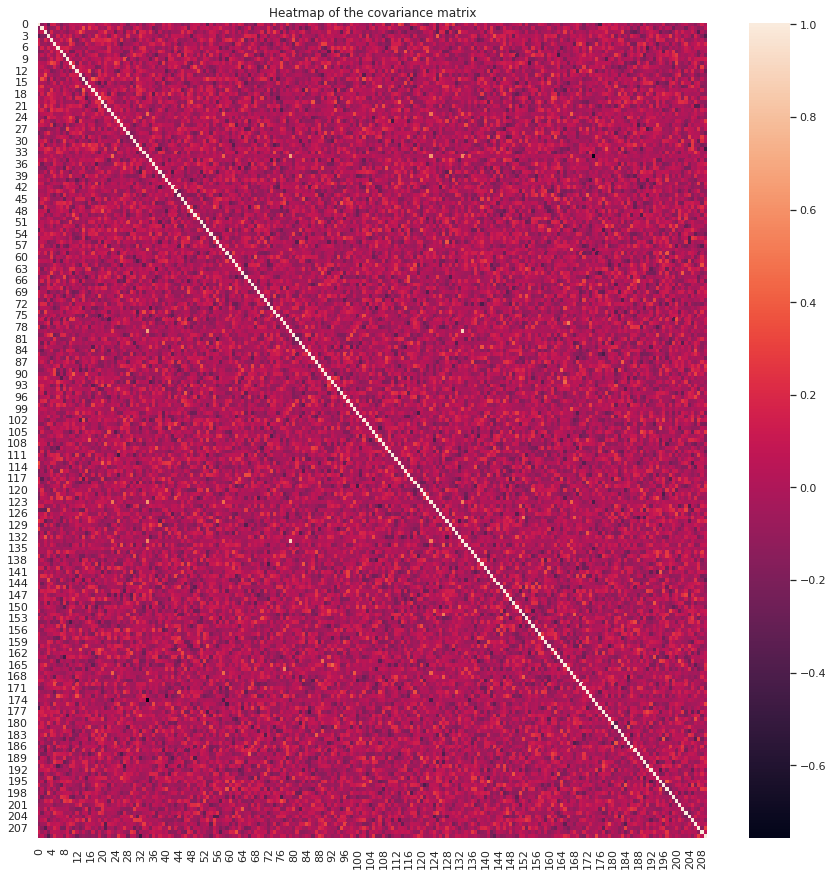

In [13]:
# Plotting the heatmap of the covariance matrix
cov_matrix = np.cov(X_train.T)

plt.figure(figsize=(15, 15))
sns.set()
sns.color_palette("colorblind")
sns.heatmap(cov_matrix)
plt.title("Heatmap of the covariance matrix")
plt.show()

We will then compute the singular value decomposition of the covariance matrix using the already established notation:

In [14]:
# Computing the singular value decomposition of the covariance matrix
U, s, V = np.linalg.svd(cov_matrix)

## Exercise 5

First, we take $C = Cov(X) = (n-1)^{-1}X^TX$ as it was stated.


Then, since the Gram matrix is defined as $X^TX$, the covariance matrix can me diagonalized as $C = VLV^T$, with V being the eigenvectors matrix and L a square diagonal matrix that contains the eigenvalues.

As we know, from the SVD over the matrix $X$ we have $X = U\Sigma V^T$. So,

$$ C = (n-1)^{-1}X^TX = (n-1)^{-1}V\Sigma^T U^TU\Sigma V^T$$


Since U is the unitary matrix $U^TU = I$ and $\Sigma$ is a diagonal matrix $\Sigma^T = \Sigma$: $$ C = (n-1)^{-1}V\Sigma^T\Sigma V^T = (n-1)^{-1}V\Sigma^2 V^T$$

Therefore, we have: $$ C = VLV^T = (n-1)^{-1}V\Sigma^2 V^T $$

And, finally: $$\lambda_i = (n-1)^{-1} \sigma_i^2$$


## Exercise 6

For this step, we are going to work with PCA to compute the first 2 PCs, which are given by the first 2 columns of the matrix *XU*.

The explained variance of each component represents how much information (variance) can be attributed to each of the principal components and it is the ratio between the variance of that principal component and the total variance.

In [15]:
# Computing the matrix XU
matrix_pc = np.dot(X_train, U)

# Taking the first two elements PC1 and PC2
pca = matrix_pc[:, [0,1]]

# Total sum of variances
total = sum(s)

# Explained variance of every element
exp_var = s/total

print("The explained variance is", exp_var[0]*100, "% for PC1 and", exp_var[1]*100, "% for PC2.")

The explained variance is 2.8318727879447074 % for PC1 and 2.5923367797720958 % for PC2.


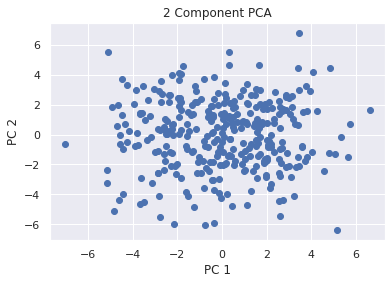

In [16]:
# Plotting the projection of the data into the 1st and 2nd components.
plt.figure()
plt.scatter(pca[:, 0], pca[:, 1])
plt.xlabel("PC 1")
plt.ylabel("PC 2")
plt.title("2 Component PCA")
plt.show()

## Exercise 7

We have that the the loadings of the variables are the coefficients of the linear combination of the original variables from which the principal components (PCs) are constructed. From a numerical point of view, the loadings are equal to the coordinates of the variables divided by the square root of the eigenvalue associated with the component.

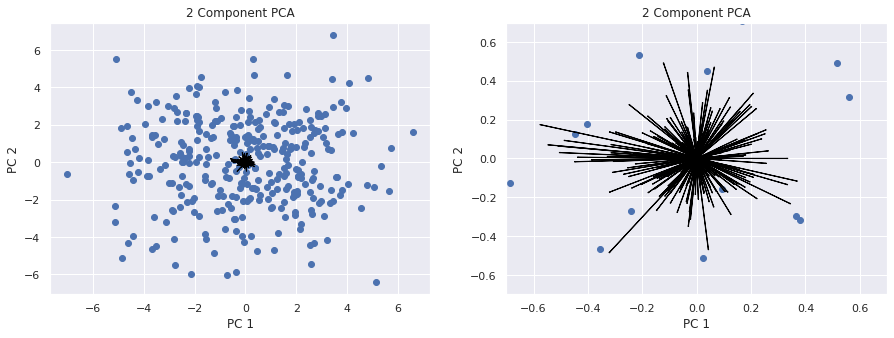

In [17]:
#Computing the loadings
loadings = (U[:, [0,1]] * np.sqrt(s)[:2])

fig, ax = plt.subplots(1,2, figsize=(15,5))

ax[0].scatter(pca[:, 0], pca[:, 1])
for i in range(len(loadings)):
  ax[0].arrow(0, 0, loadings[i][0], loadings[i][1], width = 0.005, color='black')
ax[0].set_xlabel("PC 1")
ax[0].set_ylabel("PC 2")
ax[0].set_title("2 Component PCA")

ax[1].scatter(pca[:, 0], pca[:, 1])
for i in range(len(loadings)):
  ax[1].arrow(0, 0, loadings[i][0], loadings[i][1], color='black')
ax[1].set_xlim([-0.7, 0.7])
ax[1].set_ylim([-0.7, 0.7])
ax[1].set_xlabel("PC 1")
ax[1].set_ylabel("PC 2")
ax[1].set_title("2 Component PCA")

plt.show()


## Exercise 8

We will then apply the OLS with output Y and input *X.U[:,60]*, where *U[:,60]* contains the eigenvectors (associated with the 2 largest eigenvalues)
of the covariance matrix:

In [18]:
# Computing projected data for both the train and the test data
X_train_PC = np.dot(X_train, U[:, 0:60])
X_test_PC = np.dot(X_test, U[:, 0:60])

# Applying the linear regression of the sklearn library to the low dimensional data
linreg = LinearRegression().fit(X_train_PC, y_train)
y_pred = linreg.predict(X_test_PC)
reg_coef = linreg.coef_

# The determination coefficient and the MSE of the test data
print("Determination coefficient: ", dc(y_pred, y_test))
print("MSE: ", MSE(y_pred, y_test))

# Adding a column named pca_ols to the df_test dataframe that contains the predicted values for the test sample
df_test["pca_ols"] = y_pred

Determination coefficient:  0.3349271469045263
MSE:  0.6650728530954741


# Regularization

## Exercise 9

Using utilities provided by *sklearn*, we are know going to fit a Lasso model on the train set. The Lasso regression solves the following problem:

$$ \hat{\vartheta}_n \in argmin(\frac{1}{2} \parallel Y-Z\theta \parallel^2_2 + \alpha \parallel \theta \parallel _1 ) $$

In [19]:
# LASSO using sklearn library
alpha = np.logspace(-3 , 1, 30)
lasso = LassoCV(cv=5, n_alphas=30, alphas=alpha).fit(X_train, y_train)
y_pred = lasso.predict(X_test)
lasso_coef = lasso.coef_
lasso_alpha = lasso.alpha_

# The determination coefficient and the MSE of the test data
print("Determination coefficient: ", dc(y_pred, y_test))
print("MSE: ", MSE(y_pred, y_test))

# The regulatization parameter that the algorithm selects
print("Regularization parameter: ", lasso_alpha)

# Adding columns
df_test["Lasso"] = y_pred
df_coef["Lasso"] = lasso_coef

Determination coefficient:  0.3422027348637151
MSE:  0.6577972651362853
Regularization parameter:  0.06210169418915616


## Exercise 10

In the following, the Ridge regression will be applied to the data, which solves the following optimization problem:

$$ \hat{\vartheta}_n \in argmin( \parallel Y-Z\theta \parallel^2_2 + \alpha \parallel \theta \parallel ^2 ) $$

In [20]:
# RIDGE using sklearn library
alpha = np.logspace(-1, 2, 30)
ridge = RidgeCV(alphas=alpha).fit(X_train, y_train)
y_pred = ridge.predict(X_test)
ridge_coef = ridge.coef_
ridge_alpha = ridge.alpha_

# The determination coefficient and the MSE of the test data
print("Determination coefficient: ", dc(y_pred, y_test))
print("MSE: ", MSE(y_pred, y_test))

# The regulatization parameter that the algorithm selects
print("Regularization parameter: ", ridge_alpha)

# Adding columns
df_test["Ridge"] = y_pred
df_coef["Ridge"] = ridge_coef

Determination coefficient:  0.3330750067402727
MSE:  0.6669249932597278
Regularization parameter:  48.93900918477494


# Variable selection

## Exercise 11

For this step, we are going to define the method of the forward variable selection without establishing the stop criterion. The order of the variable selection will also be provided.

The method starts with no features and, at each step, the one with the best performance, which is also the one with the minimum p-value,  is included. The process repeats until there is no significant improvement in the model's performance.

From the courses, we also know that the smallest p-value also represents the largest T. We will then use the definition of T to implement the code.



In [21]:
# Dimensions of X
n, p = X_train.shape

# Defining important variables
r = np.copy(y_train) # Initial condition of the residue
features = []  # Array with the selected covariates in the right order
A = [k for k in range(p)]   # Array with the covariates
p_values = [k for k in range(p)] # Array with selected p_values

# Unidimensional regression coefficient
def coef(X, r):
  ols = LinearRegression(fit_intercept=True)
  reg = ols.fit(X.reshape(-1, 1), r)
  coef = reg.coef_ # Unidimensional regression's coefficient
  return coef

# Tstat for a single each element
def T(X, r):
    return (np.abs(coef(X, r))/(((np.dot(X.T,X)/len(X))**(-1/2))*(np.linalg.norm(r - coef(X, r)*X)/(len(X)-2)**(1/2))))[0]*len(X)**(1/2)

# List containing all T values for a given set of features
def Tvalues(A, X, r):
  list_T = np.zeros(p)
  for i in A:
    list_T[i] = T(X[:, i], r)
  return list_T


# Stops when it contains all variables
while len(features) != p:

  # All T for the requested indices
  list_T = Tvalues(A, X_train, r)

  # Index position of the variable with largest T
  index = np.where(list_T == np.max(list_T))[0][0]

  # Changes i of lists
  A.remove(index)
  features.append(index)
      
  # New value of residue
  r = r - coef(X_train[:, index], r)*X_train[:, index]
      
  # P-value associated with the highest T, saving it on the corresponding index
  p_values[index] = 2*(1-stats.norm.cdf(list_T[index]))

In [22]:
print("Order of variable selection without stop condition: \n", features)

Order of variable selection without stop condition: 
 [58, 123, 208, 133, 129, 13, 77, 92, 34, 152, 31, 131, 59, 196, 135, 102, 167, 56, 60, 63, 110, 130, 99, 138, 97, 53, 169, 69, 36, 79, 21, 174, 122, 51, 61, 159, 49, 74, 75, 12, 202, 95, 112, 163, 191, 204, 81, 23, 193, 147, 183, 55, 24, 108, 8, 14, 103, 19, 115, 197, 118, 71, 88, 155, 139, 83, 141, 30, 182, 168, 2, 154, 6, 149, 104, 181, 18, 199, 101, 57, 165, 93, 134, 50, 64, 65, 188, 78, 180, 136, 85, 146, 25, 87, 28, 15, 172, 171, 156, 37, 22, 201, 119, 9, 73, 38, 162, 144, 120, 32, 41, 5, 194, 125, 113, 117, 145, 43, 67, 205, 148, 84, 206, 192, 127, 161, 7, 158, 10, 106, 46, 39, 94, 203, 140, 151, 70, 128, 190, 200, 186, 185, 3, 96, 175, 164, 16, 40, 27, 105, 48, 160, 44, 54, 90, 111, 1, 45, 198, 26, 132, 114, 72, 177, 29, 91, 195, 207, 76, 20, 179, 142, 143, 209, 121, 42, 109, 52, 173, 153, 166, 62, 100, 89, 184, 176, 0, 86, 178, 82, 189, 107, 124, 126, 66, 47, 4, 116, 33, 35, 11, 187, 98, 157, 150, 170, 68, 80, 17, 137]


## Exercise 12

Here, we are going to stop if the p-value is larger than 0.05. The method is going to be illustrated with the graphs of the test statistics obtained when selecting the 1st, 2nd and 3rd variables:

In [23]:
# Defining important variables
r_ = np.copy(y_train) # Initial condition of the residue
features_ = []  # Array with the selected covariates in the right order
A_ = [k for k in range(p)]   # Array with the covariates

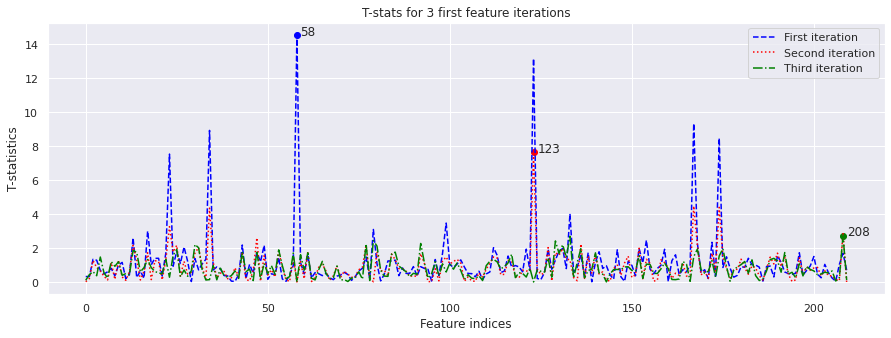

In [24]:
# Plots each iteration's graph
plt.figure(figsize=(15, 5))
plt.xlabel('Feature indices')
plt.ylabel('T-statistics')
plt.title('T-stats for 3 first feature iterations')

for j in range(3): # Obtaining for the first 3 variables
    # Repeting the same method
    list_T = Tvalues(A_, X_train, r_)
    index = np.where(list_T == np.max(list_T))[0][0]
    features_.append(index)
    A_.remove(index)

    r_ = r_ - coef(X_train[:, index], r_)*X_train[:, index]
    
    # Plot for the first variable
    if j == 0:
        plt.plot(range(p), list_T, color='blue', label='First iteration', ls='--')
        plt.scatter(index, list_T[index], color='blue')
        plt.text(index + 1, list_T[index], str(index))

    # Plot for the second variable
    elif j == 1:
        plt.plot(range(p), list_T, color='red', label='Second iteration', ls=':')
        plt.scatter(index, list_T[index], color='red')
        plt.text(index + 1, list_T[index], str(index))

    # Plot for the third variable
    else:
        plt.plot(range(p), list_T, color='green', label='Third iteration', ls='-.')
        plt.scatter(index, list_T[index], color='green')
        plt.text(index + 1, list_T[index], str(index))

plt.legend()
plt.show()

The graphs of the first 50 p-values is:

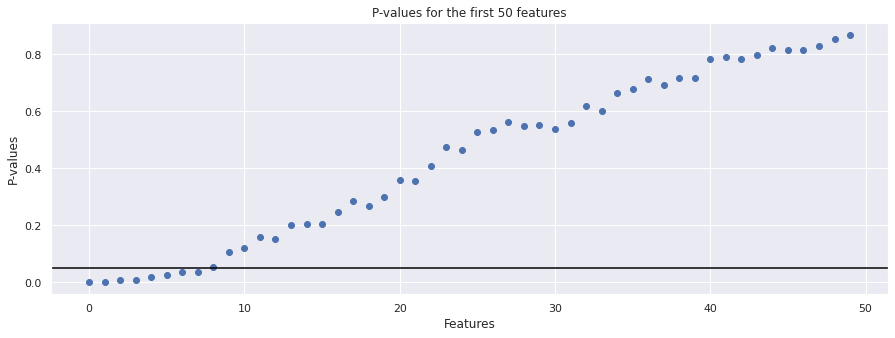

In [25]:
plt.figure(figsize=(15,5))
plt.scatter(range(50), pd.DataFrame(p_values).loc[features[:50]])
plt.axhline(y=0.05, color='black')
plt.title('P-values for the first 50 features')
plt.xlabel('Features')
plt.ylabel('P-values')
plt.show()

Finally, the list of the selected variables is:

In [26]:
selected = np.arange(p)[np.array(p_values) < 0.05]
print(selected)

[ 13  58  77  92 123 129 133 208]


## Exercise 13

Finally, we are going to run the OLS on the selected variables:

In [27]:
# OLS using sklearn library
X_train_fvs = X_train[:, selected]
X_test_fvs = X_test[:, selected]

fvs = LinearRegression().fit(X_train_fvs, y_train)
fvs_coef = np.zeros(p)
fvs_coef[selected] = fvs.coef_
y_pred = fvs.predict(X_test_fvs)

# The determination coefficient and the MSE of the test data
print("Determination coefficient: ", dc(y_pred, y_test))
print("MSE: ", MSE(y_pred, y_test))

# Adding columns
df_test["FVS"] = y_pred
df_coef["FVS"] = fvs_coef

Determination coefficient:  0.2579822502050442
MSE:  0.7420177497949563


# Comparison

## Exercise 14

Summarising the results of all our methods, we have:

* **OLS**:

Determination coefficient:  0.1766325158986617

MSE:  0.8233674841013389

* **PCA before OLS**:

Determination coefficient:  0.3349271469045271

MSE:  0.6650728530954734

* **Lasso**:

Determination coefficient:  0.34176571047402016

MSE:  0.6582342895259803

* **Ridge**:

Determination coefficient:  0.33302581248518015

MSE:  0.6669741875148203

* **OLS after forward variable selection**:

Determination coefficient:  0.2579822502050442

MSE:  0.7420177497949563

It is clear to see that, considering these metrics, the PCA before OLS, the Lasso and the Ridge give really similar results. Although close, the results for OLS after forward selection are worse then those cases, followed by the results from OLS.

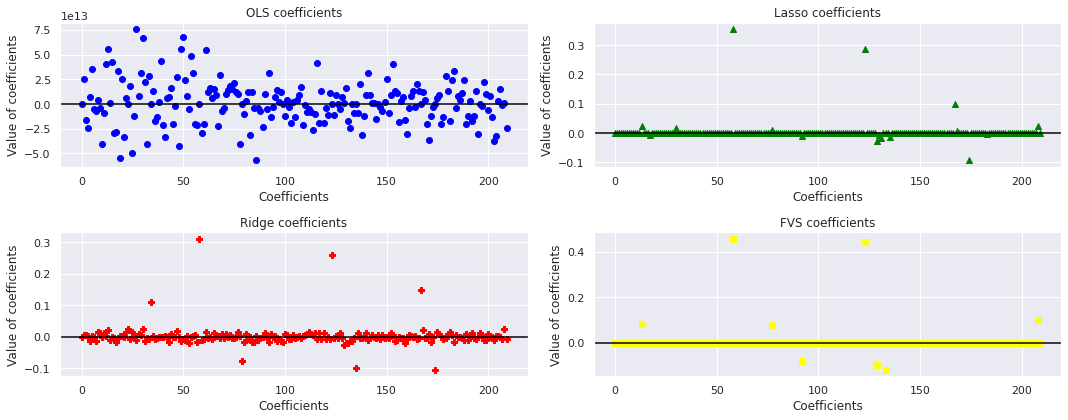

In [28]:
plt.subplots(2, 2, figsize=(15, 6))

plt.subplot(221)
plt.scatter(range(p), df_coef.loc[:, 'OLS'], color='blue', marker='o')
plt.axhline(y=0, color='black')
plt.title('OLS coefficients')
plt.ylabel('Value of coefficients')
plt.xlabel('Coefficients')


plt.subplot(222)
plt.scatter(range(p), df_coef.loc[:, 'Lasso'], color='green', marker='^')
plt.axhline(y=0, color='black')
plt.title('Lasso coefficients')
plt.ylabel('Value of coefficients')
plt.xlabel('Coefficients')


plt.subplot(223)
plt.scatter(range(p), df_coef.loc[:, 'Ridge'], color='red', marker='P')
plt.axhline(y=0, color='black')
plt.title('Ridge coefficients')
plt.ylabel('Value of coefficients')
plt.xlabel('Coefficients')


plt.subplot(224)
plt.scatter(range(p), df_coef.loc[:, 'FVS'], color='yellow', marker='s')
plt.axhline(y=0, color='black')
plt.title('FVS coefficients')
plt.ylabel('Value of coefficients')
plt.xlabel('Coefficients')


plt.tight_layout()
plt.show()

## Exercise 15

Analysing the number of coefficients that are set exactly to zero by each of the methods considered in the data frame, we can notice that it is significantly bigger for Lasso and FVS then for OLS and Ridge, since for the last two the value is 0.

The difference between the Lasso and the Ridge comes from the fact that the Lasso gives us a sparce solution, since its objective is to select the most relevant features and keep only them in the model. However, the Ridge does not have the same goal, since it aims to stop a normal OLS model from having very large coefficients. Therefore, it is expected that the Lasso has many zeros while the Ridge has very few or none, which can be constated below.

In [29]:
zeros_ols = np.count_nonzero(df_coef.loc[:, 'OLS'] == 0)
print(f" OLS: ", zeros_ols, "coefficients set to zero")

zeros_lasso = np.count_nonzero(df_coef.loc[:, 'Lasso'] == 0)
print(f" Lasso: ", zeros_lasso, "coefficients set to zero")

zeros_ridge = np.count_nonzero(df_coef.loc[:, 'Ridge'] == 0)
print(f" Ridge: ", zeros_ridge, "coefficients set to zero")

zeros_fvs = np.count_nonzero(df_coef.loc[:, 'FVS'] == 0)
print(f" FVS: ", zeros_fvs, "coefficients set to zero")

 OLS:  0 coefficients set to zero
 Lasso:  193 coefficients set to zero
 Ridge:  0 coefficients set to zero
 FVS:  202 coefficients set to zero


## Exercise 16

The pairplot of the *df_test* dataframe is given below. 

In the pairplot, the graphs on the principl diagonal are the distribution of the corresponding method. The other graphs represent the comparation of the two corresponding methods and, on these cases, the similarity is given by the proximity of the points with a $45^{\circ}$ line. Therefore, we can see that the OLS is the that differs the most from other methods and that the PCA OLS and the Ridge are the most similar methods for this case.

The equation to predict the value of a new unseen data point x for each method is:

* Ridge: $Y = \widehat{\theta}^{rd}x$

* OLS: $Y = \widehat{\theta}^{ols}x$

* PCA before OLS: $Y = \widehat{\theta}^{pca}xU_n$

* Lasso: $Y = \widehat{\theta}^{ls}x$

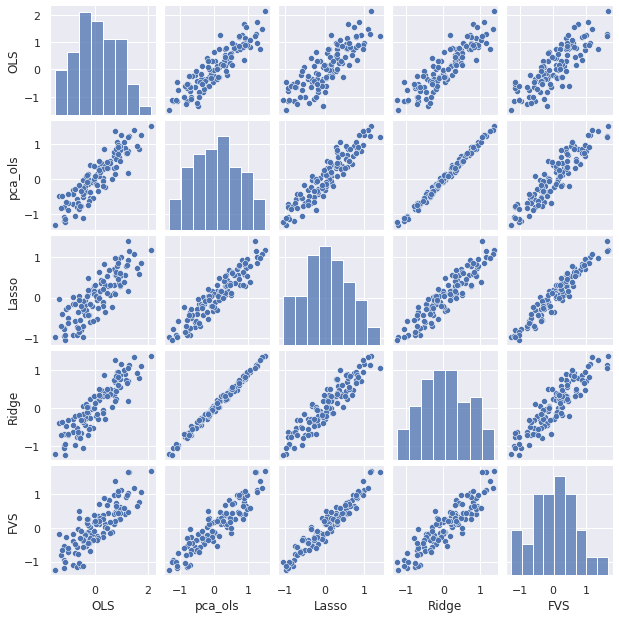

In [30]:
# Plotting pairplot graph for all methods
sns.pairplot(df_test, height=1.75)
plt.show()

# Confidence intervals and bootstrapping

## Exercise 17

For this step, we load the Diabetes dataset form *sklearn* and define X as the 3rd column of the loaded data, so the feature matrix consists only on variable 3 from the original dataset. 

In [31]:
from sklearn.datasets import load_diabetes
df = load_diabetes(return_X_y=True)

# 3rd column
X = df[0][:,2]
X = X.reshape(-1,1)

y = df[1]
y = y.reshape(-1,1)

We then use the OLS model to find the coefficient $\theta_1$ for the slope:

In [32]:
# OLS model
linreg = LinearRegression().fit(X, y)
coef = linreg.coef_[0][0]
print(f"The coefficient for the slope is", coef)

The coefficient for the slope is 949.4352603839491


The expression for the confidence intervals is given on the code below. We are going to evaluate it for $α = 0.05$:


In [33]:
def confidence_interval(X, y, alpha):
  # Shape of X
  n, p = X.shape

  # We add a column of ones to X
  X_ones = np.hstack((np.ones((n,1)), X))

  # OLS model
  linreg = LinearRegression().fit(X_ones, y)
  pred = linreg.predict(X_ones).reshape(-1,1)
  coef = linreg.coef_

  # Value of the residue
  r = y - pred

  g = 1/n * np.dot(X_ones.T, X_ones) # Gram matrix
  noise = np.sqrt(1/(n-2) * np.linalg.norm(r)**2) # Noise level
  s = np.sqrt((np.array([0,1]).T).dot(np.linalg.inv(g)).dot(np.array([0,1])))

  ci = (s*noise)/np.sqrt(n) # CI

  lower = coef[0][1] - stats.norm.ppf(1 - alpha/2) * ci # Lower bound
  upper = coef[0][1] + stats.norm.ppf(1 - alpha/2) * ci # Upper bound

  return (lower, upper)

In [34]:
l, u = confidence_interval(X, y, 0.05)
ci = (l,u)
print(f"The confidence interval is given by", ci)

The confidence interval is given by (826.9078727692428, 1071.962647998657)


Here, we generate k bootstrap samples from $Xy$, for
$k = np.linspace(10,10000)$ and Xy being the concatenation of X and y. For each value of k, we will estimate the $\theta_1$ coefficient for each bootstrapped sample with sklearn, and then get an approximation of the CI by getting the $(\alpha, 1 - \alpha)$ percentile of the values calculated previously:


In [35]:
# Concatenate Xy
Xy = np.hstack((X, y))
n, p = Xy.shape
n_list = [k for k in range(n)]

CI  = []
k = np.linspace(10,10000)
k = k.astype(int)

for i in k:
  l = []
  for j in range(i):
    index = np.random.choice(n_list, n)
    sample = Xy[index,:] # Bootstrap sample

    # OLS model
    linreg = LinearRegression().fit(sample[:, 0].reshape(-1,1), sample[:, 1])
    l.append(linreg.coef_[0]) # List of coefficients

  u_approx = np.percentile(l, q = 2.5) # Upper bound to the approximation
  l_approx = np.percentile(l, q = 97.5) # Lower bound to the approximation
  approx = (u_approx, l_approx)

  CI.append(approx)


In [36]:
print("The approximations of CI are:", CI)

The approximations of CI are: [(882.2347555221278, 1027.1039091155667), (853.0861579716017, 1061.7074850872493), (825.9766392028658, 1056.1658019191007), (834.0905211984673, 1061.9169966763006), (840.4180186053455, 1055.0295718205975), (834.3576232889968, 1066.7876701162131), (842.1494488467291, 1066.7630489223504), (839.2379691728709, 1056.2333709707268), (838.9918311795581, 1055.456598451589), (840.7762233622426, 1060.3488520910919), (836.2960423093234, 1063.674197739861), (840.1111794543916, 1063.9903296903867), (836.5580103089967, 1061.694321171644), (837.4567380952573, 1055.8443871979862), (832.9606204433751, 1059.5045935380258), (838.0250076315134, 1063.1290849786421), (837.9320070868035, 1062.2021780587854), (835.8943976171756, 1059.4843024558259), (835.2198309656771, 1060.551915082734), (839.2942503646974, 1064.4030021777332), (836.4158303231875, 1061.6236421638102), (836.5356949809204, 1063.1995120909235), (839.1100538942072, 1061.6094733380103), (836.7329627244495, 1060.11450

For each value of k, the following graph represents the difference between the approximated CI in the previous step and the real CI:

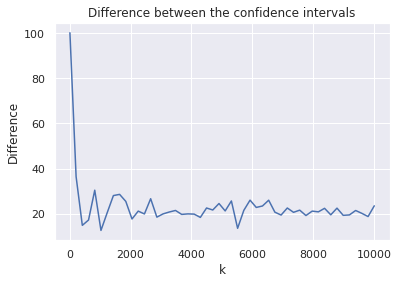

In [37]:
difference = (ci[1] - ci[0]) - [i[1] - i[0] for i in CI]

plt.figure()
plt.plot(k, difference)
plt.title('Difference between the confidence intervals')
plt.xlabel('k')
plt.ylabel('Difference')
plt.show()

Finally, we can see that the CI decreases with $\alpha$:

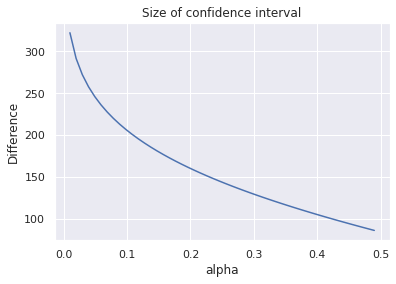

In [38]:
alpha = np.linspace(0.01, 0.49)

CI_alpha = [confidence_interval(X, y, a) for a in alpha]
size = [ci[1] - ci[0] for ci in CI_alpha]

plt.figure()
plt.plot(alpha, size)
plt.title('Size of confidence interval')
plt.xlabel('alpha')
plt.ylabel('Difference')
plt.show()
